In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fkochan","key":"d10e08f68f432291ddddfbc0f0324027"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 1.15G/1.15G [00:10<00:00, 64.1MB/s]
100% 1.15G/1.15G [00:10<00:00, 114MB/s] 


In [6]:
!ls

chest-xray-pneumonia.zip  kaggle.json  sample_data


In [0]:
#!unzip \*.zip

In [11]:

!ls

chest_xray		  chest_xray.zip  __MACOSX
chest-xray-pneumonia.zip  kaggle.json	  sample_data


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = 'content/chest_xray'

In [21]:
%cd chest_xray/

/content/chest_xray


In [22]:
!ls

test  train  val


In [0]:
path = Path('/content/chest_xray/')

In [0]:
data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, ds_tfms=get_transforms(),size=224, bs=64).normalize(imagenet_stats)

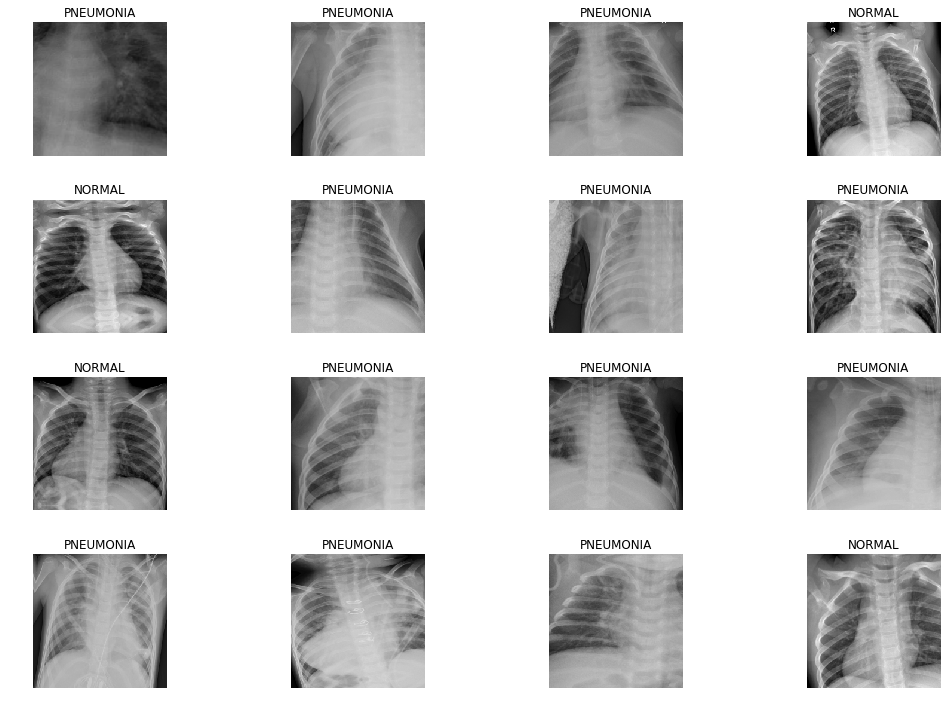

In [27]:
data.show_batch(4, figsize=(15,10))

In [28]:
data.c, len(data.train_ds), len(data.valid_ds)

(2, 4685, 1171)

In [29]:
learn = cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 67842285.38it/s]


In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.352946,0.249679,0.912895,04:39
1,0.225014,0.220633,0.918019,04:35
2,0.186002,0.180647,0.929120,04:35
3,0.164471,0.167650,0.940222,04:35


In [0]:
learn.save('first_model-xray')

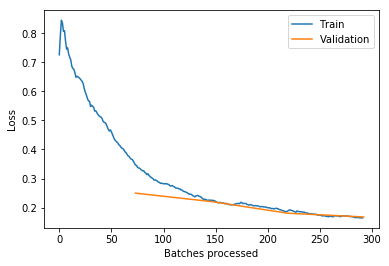

In [33]:
learn.recorder.plot_losses()
plt.show()